In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
from matplotlib import cm
from matplotlib import colors as c
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters
import os

In [14]:
path = os.environ.get('GQPMC_DIR')
path+='mini_mocha/ispeculator/james/'
print(path)

/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/james/


In [15]:
specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'none', lib='bc03', sample = 'mini_mocha') 

In [16]:
spec_wavelen = specs['wave'][0]
spec_flux = specs['flux'][:97]

In [46]:
class plotter():
    def __init__(self,walkers,data_dir, igal):
        idx1 = data_dir.index('lgal.')
        idx2 = data_dir.index('hdf5')
        self.obj_name = data_dir[idx1:idx2+4]
        self.num_walkers = walkers
        self.igal = igal
        self.data_dir = data_dir
        self.f = h5py.File(self.data_dir,'r')
        
        self.model_wl = self._get_data('wavelength_model')
        self.fit_wl = self._get_data('wavelength_data')
        assert np.array_equal(self.model_wl,self.fit_wl)
        
        self.model_spec_flux = self._get_data('flux_spec_model')
        self.fit_spec_flux = self._get_data('flux_spec_data')
        self.fit_spec_flux_ivar = self._get_data('flux_spec_ivar_data')
        
        self.model_photo_flux = self._get_data('flux_photo_model')
        self.fit_photo_flux = self._get_data('flux_photo_data')
        self.fit_photo_flux_ivar = self._get_data('flux_photo_ivar_data')
        if igal==0:
            plt.title('wavelength model')
            plt.scatter(self.fit_wl,self.fit_wl, alpha = 0.005)

    
    def _get_data(self,key):
        try:
            data = self.f[key][...]
        except:
            raise ValueError
        return data
    
    def show_joint_spectra(self):
        fig, axs = plt.subplots(2,1, figsize = (10,5), gridspec_kw={'height_ratios': (7,3)}, sharex = True)
        axs[0].plot(self.model_wl, self.model_spec_flux, c = 'r', lw = 0.8, label ='Model', zorder = 10)
#         ylim = axs[0].set_ylim()
        axs[0].set_title(self.obj_name,fontsize= 15)
        axs[0].set_ylabel('Flux', fontsize = 15)
        axs[1].set_ylabel('Residual', fontsize = 15)
        axs[1].set_xlabel('$\lambda$[Å]', fontsize = 15)
        axs[0].plot(self.fit_wl, self.fit_spec_flux, c = 'k', lw = 0.8, label = 'Bestfit', zorder = 0)
        std = 1/(np.sqrt(self.fit_spec_flux_ivar))
        axs[1].fill_between(self.fit_wl,-std,std, color = 'k', alpha = 0.2)
        axs[0].legend()
        axs[0].grid()
        axs[1].grid()
        plt.show()
#         plt.scatter(std,std)
#         axs[0].set_ylim(ylim)


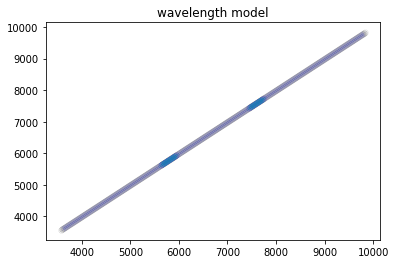

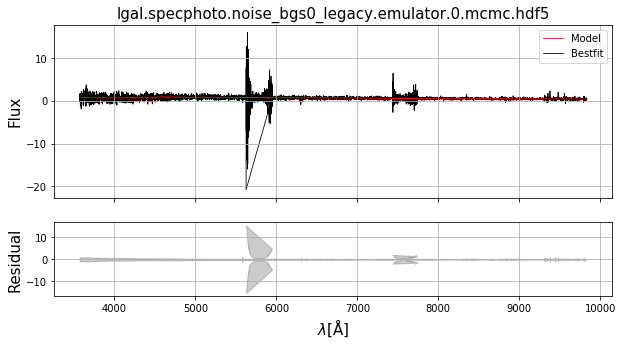

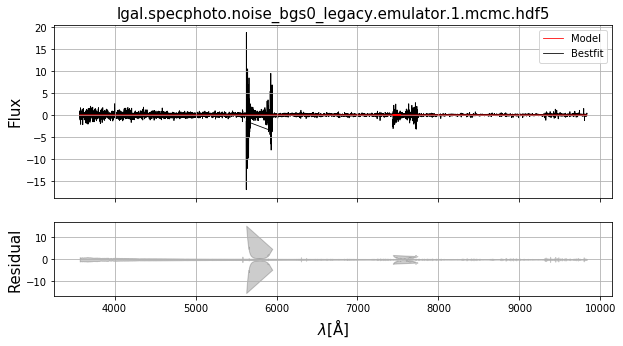

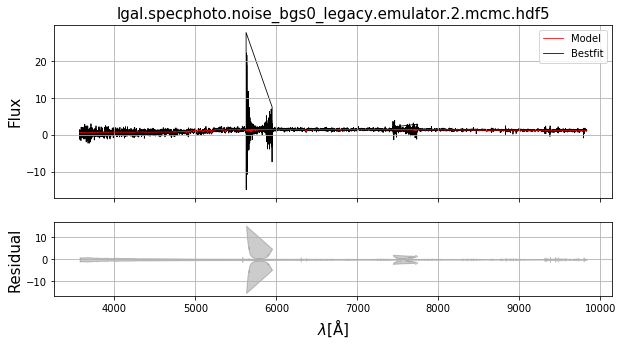

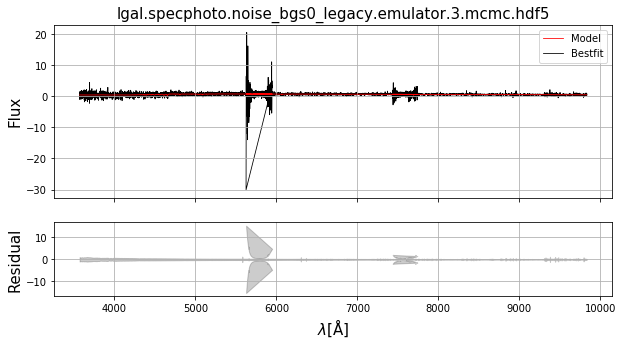

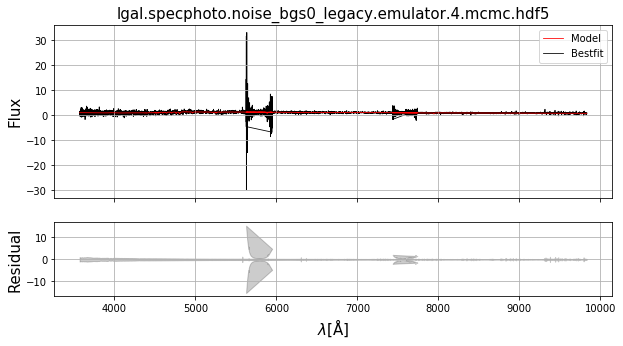

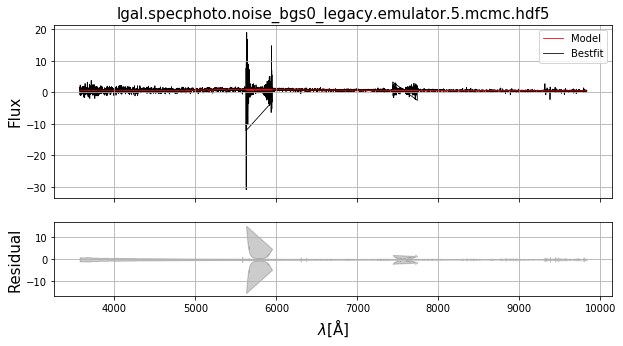

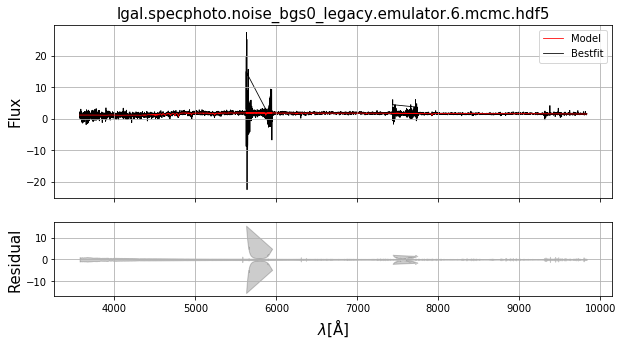

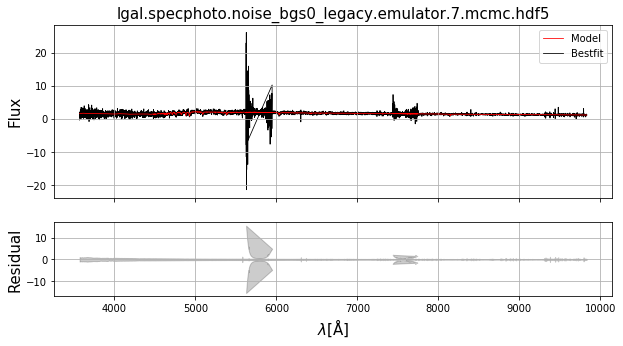

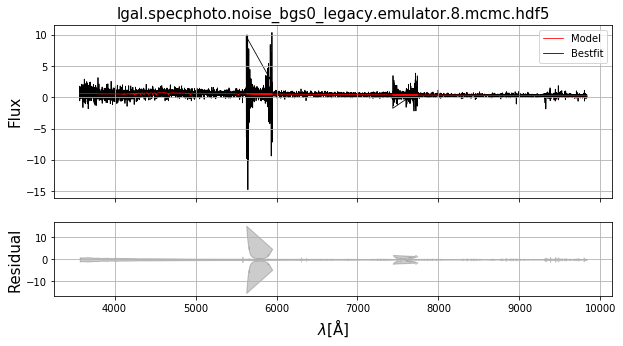

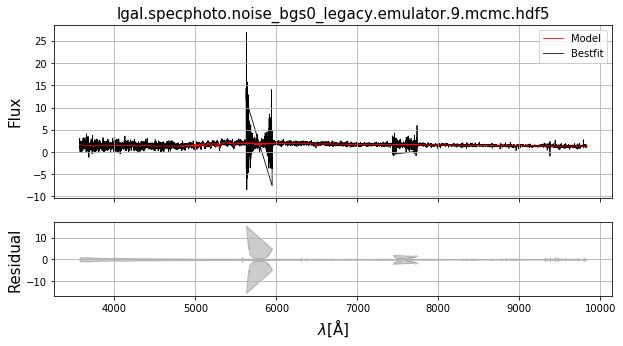

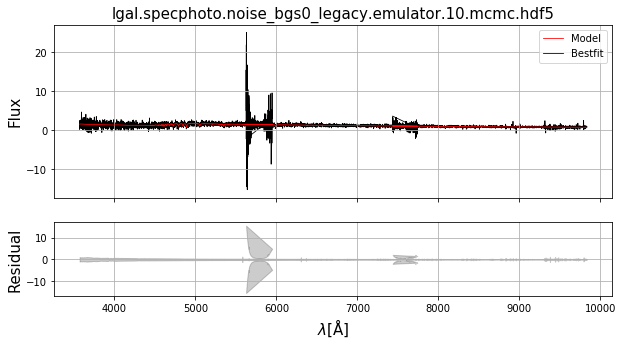

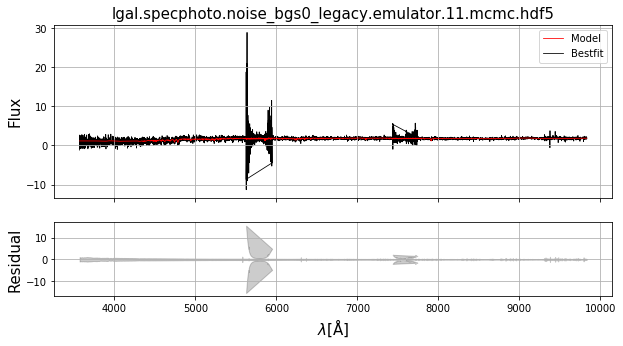

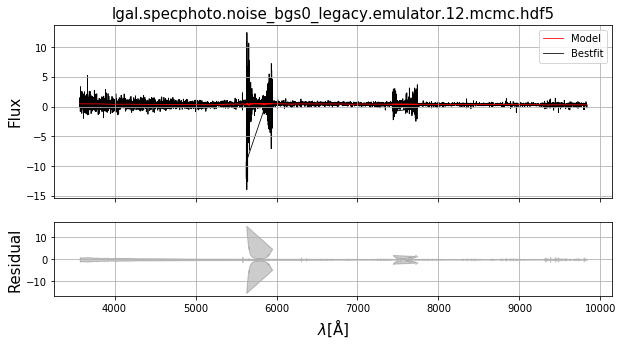

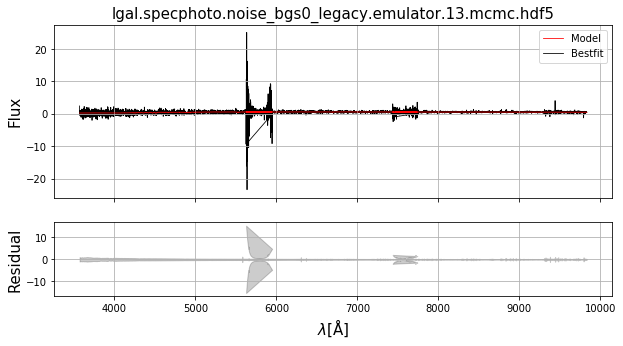

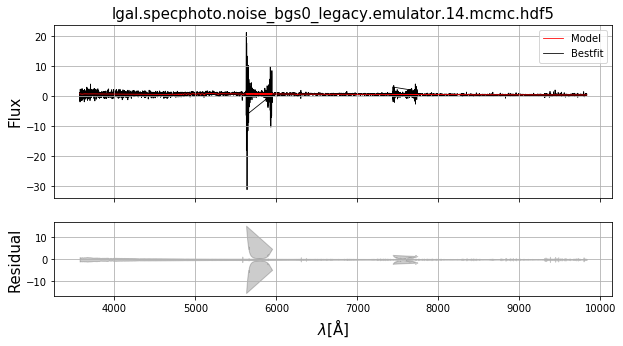

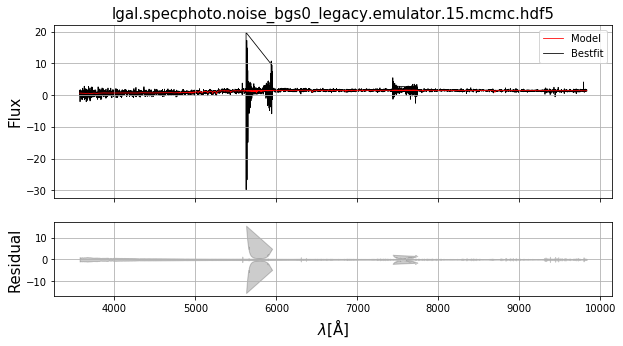

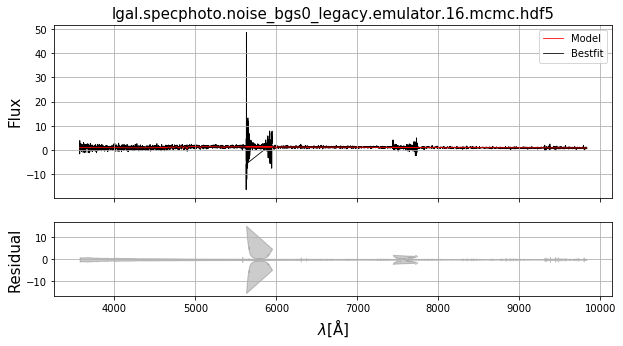

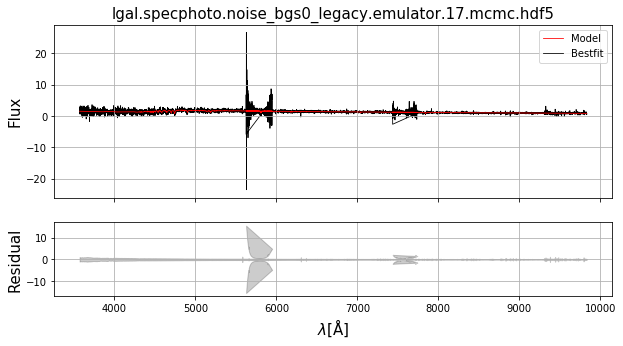

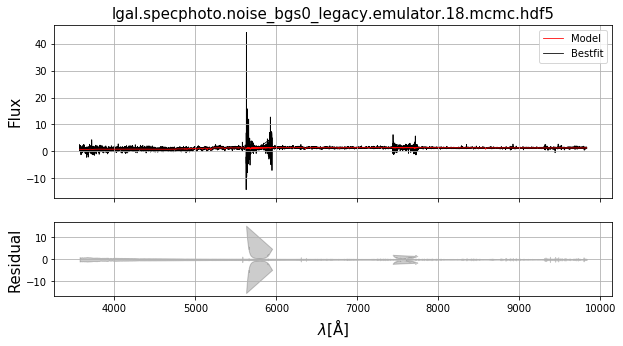

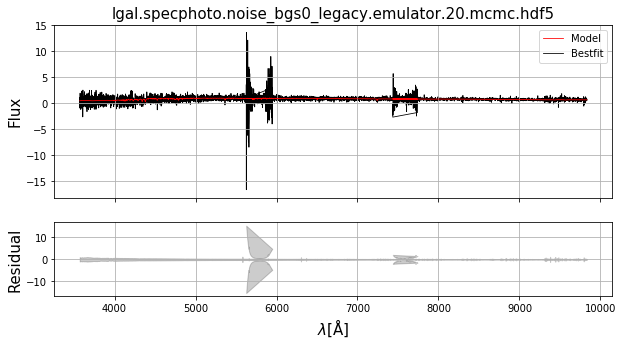

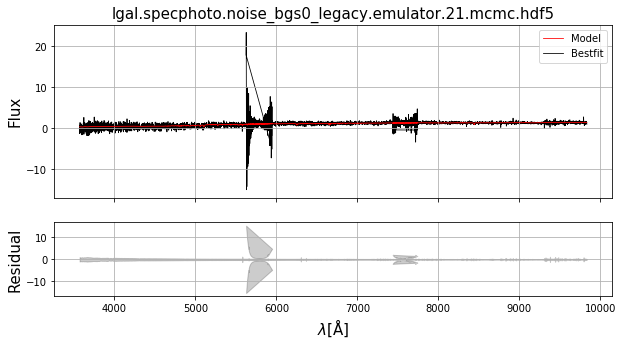

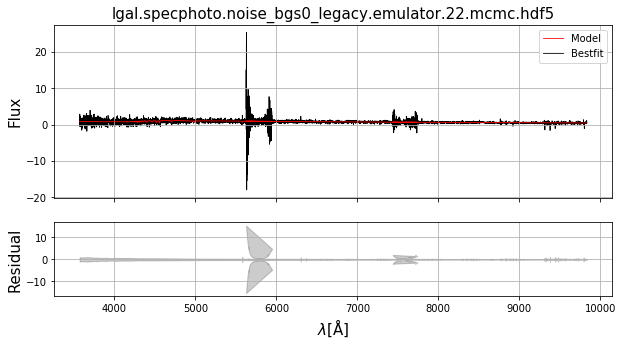

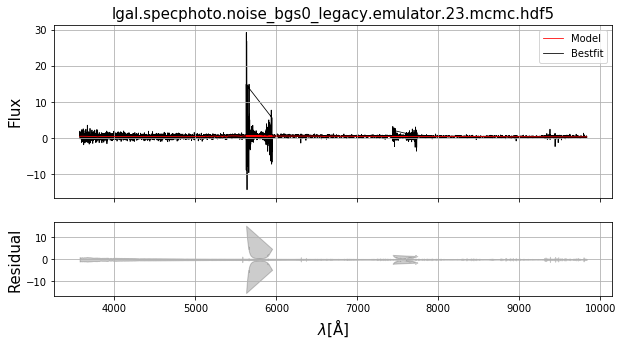

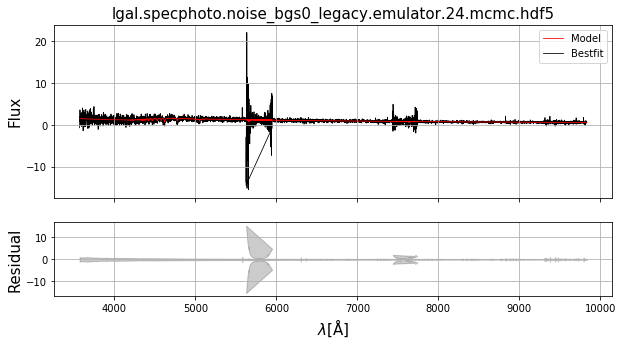

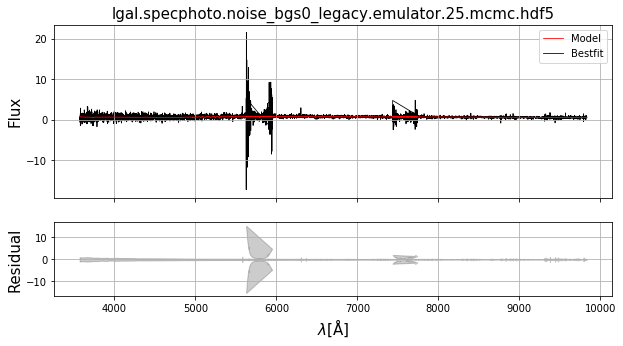

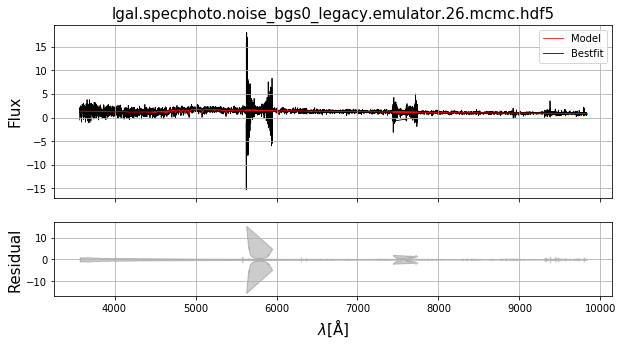

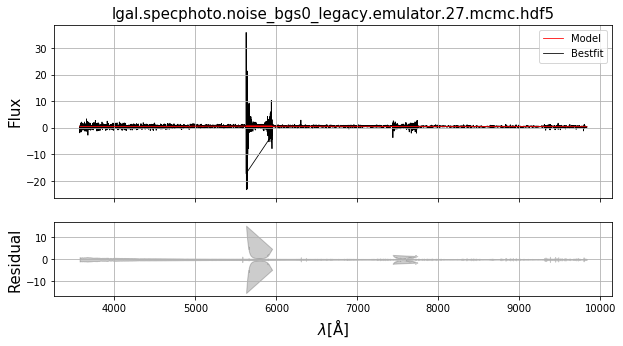

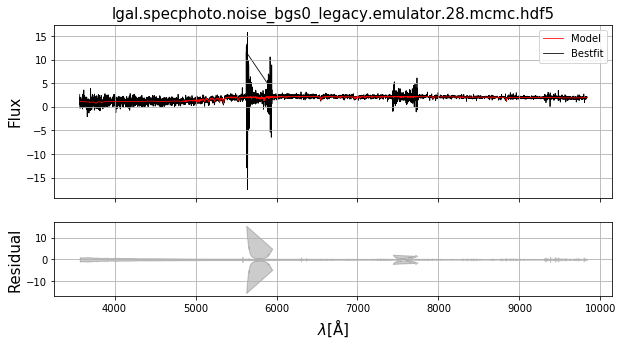

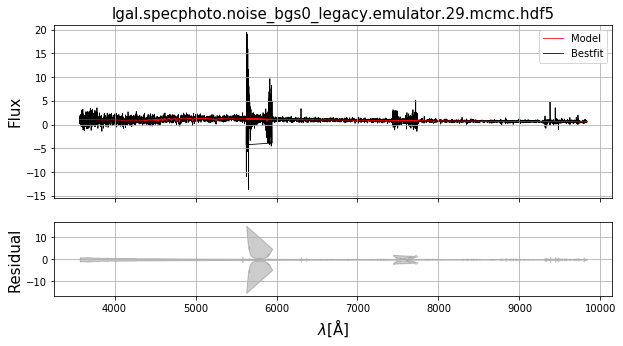

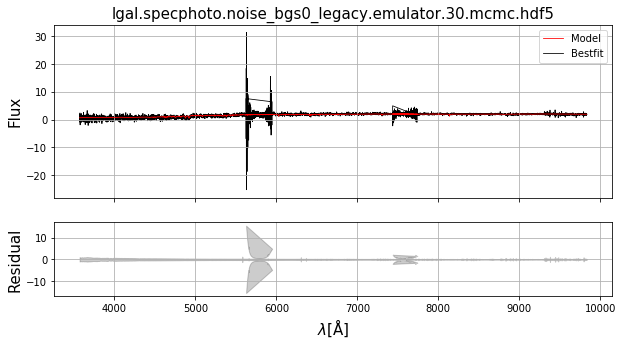

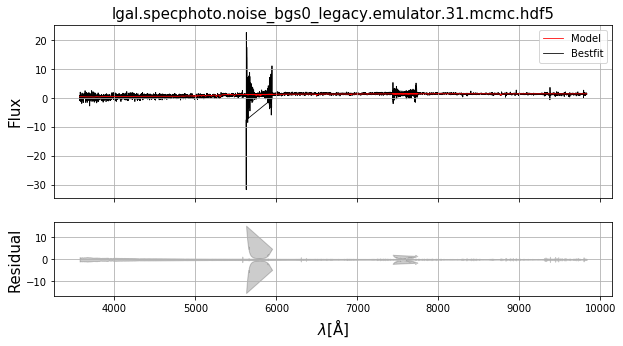

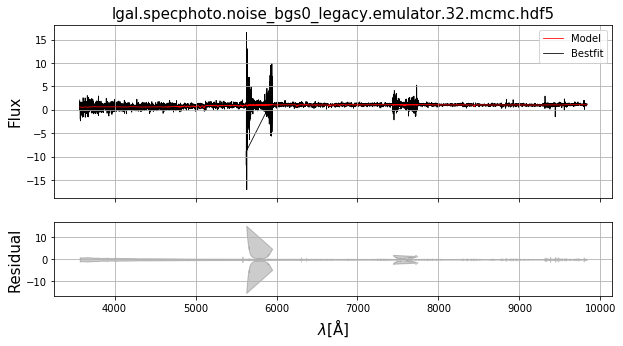

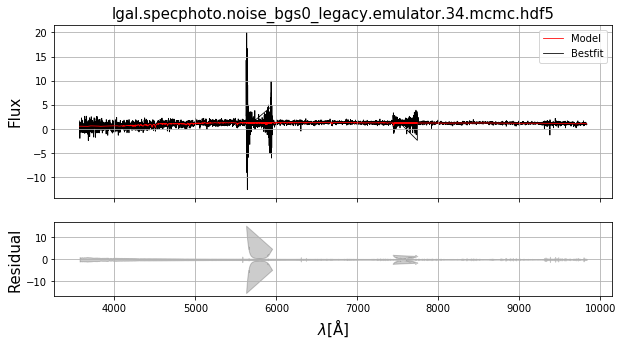

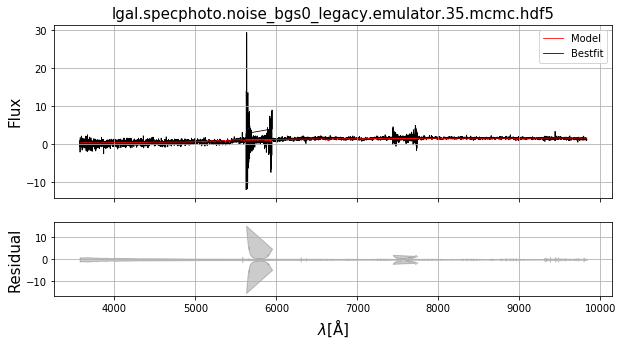

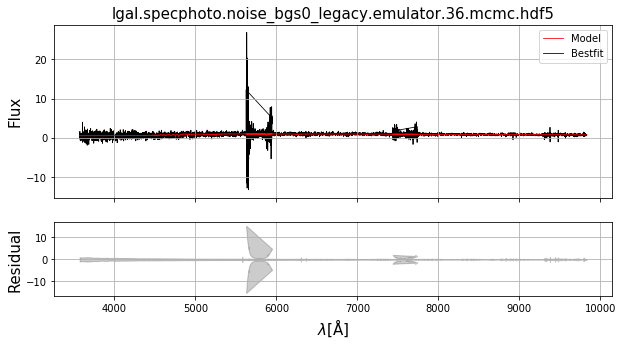

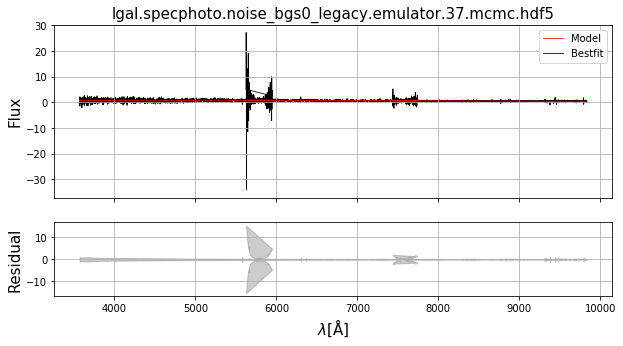

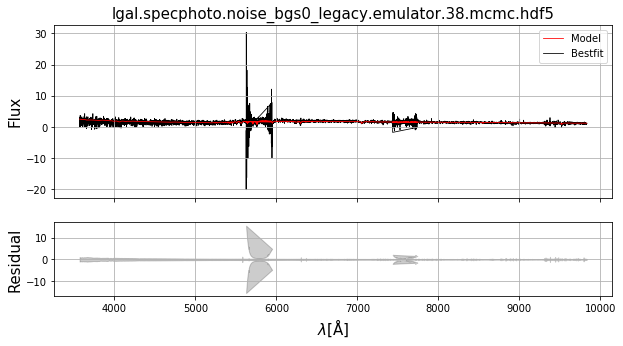

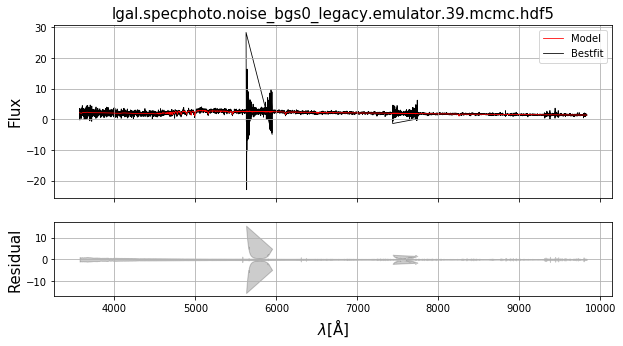

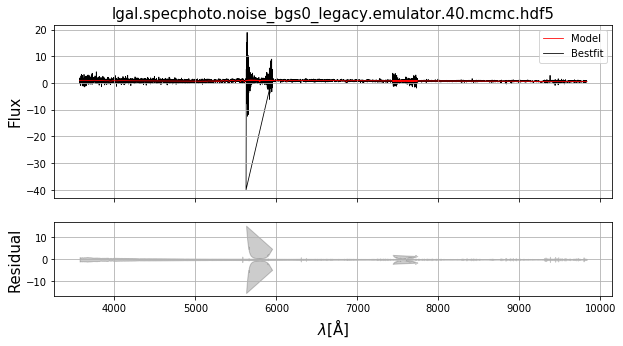

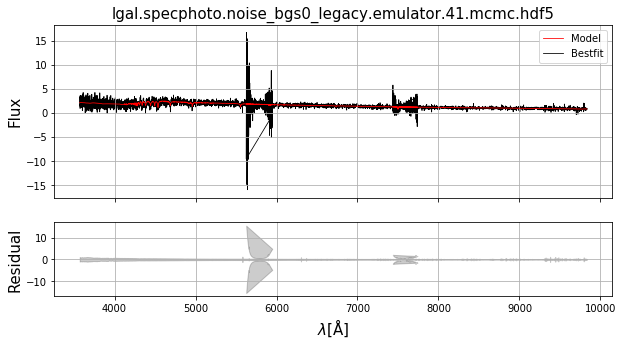

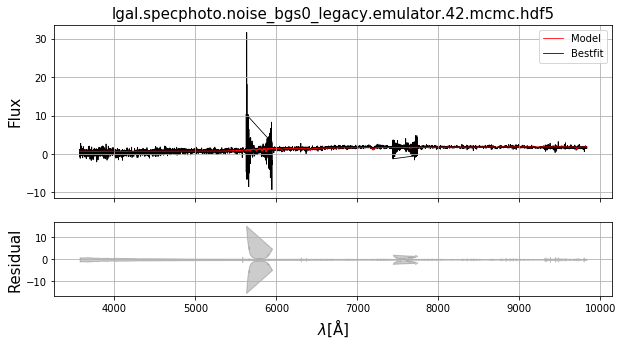

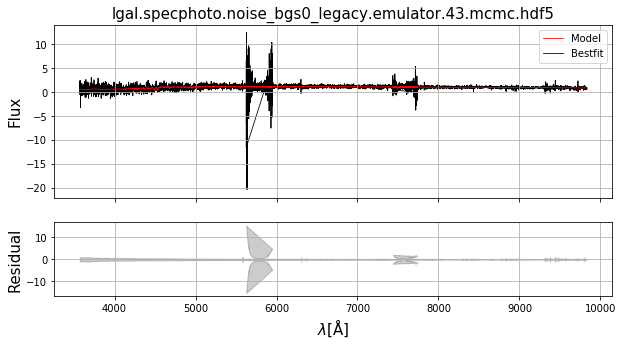

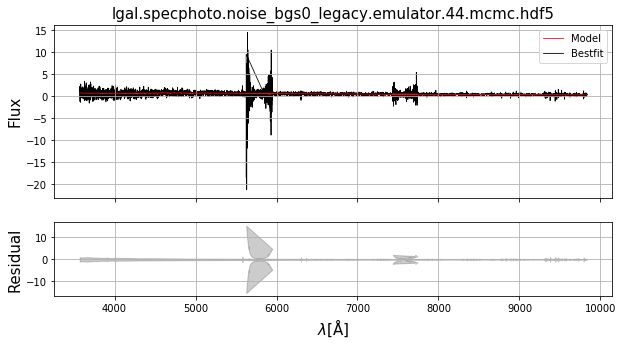

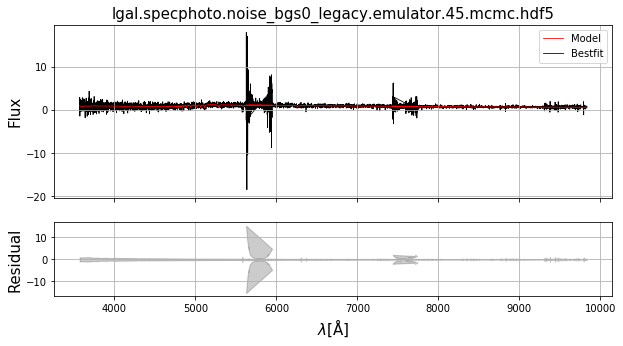

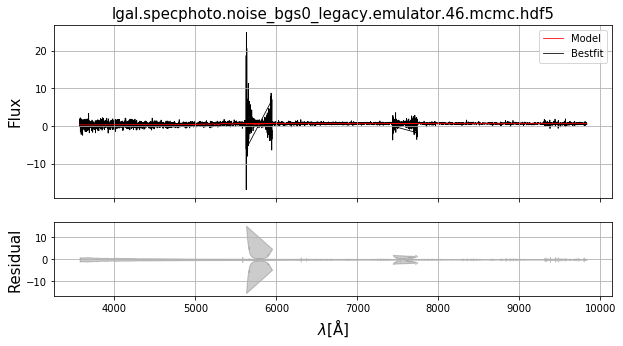

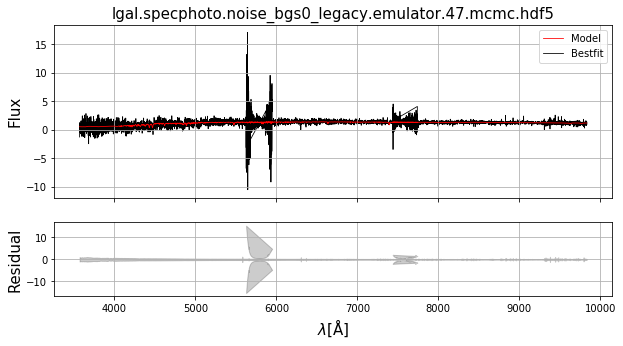

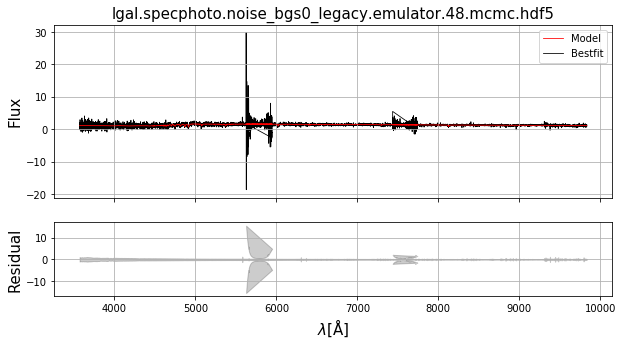

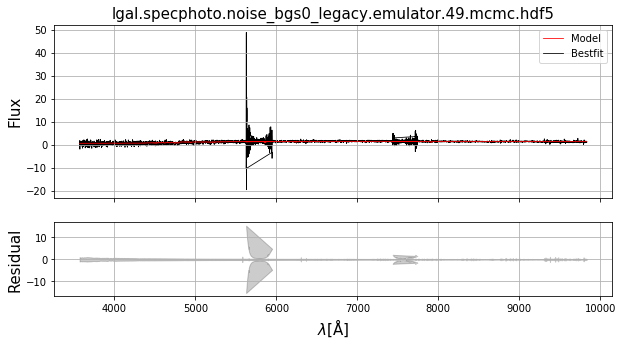

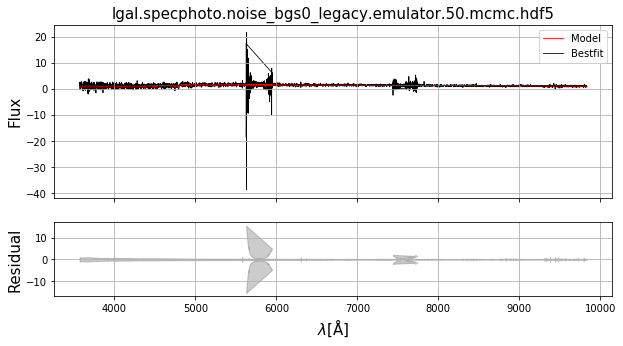

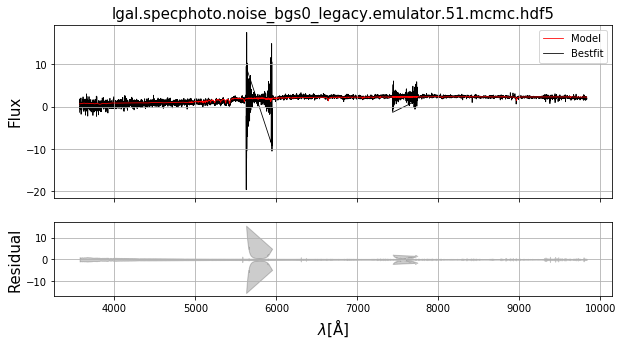

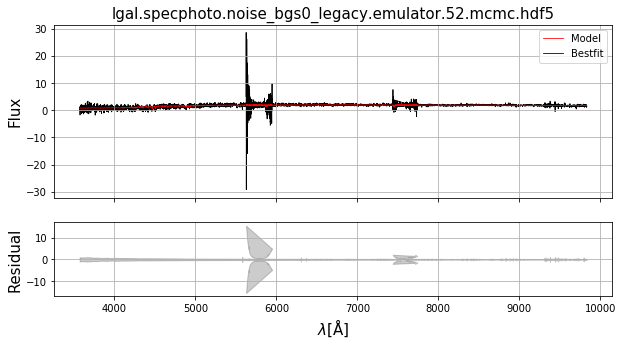

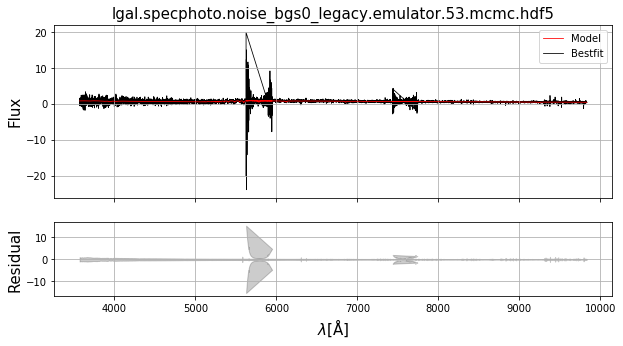

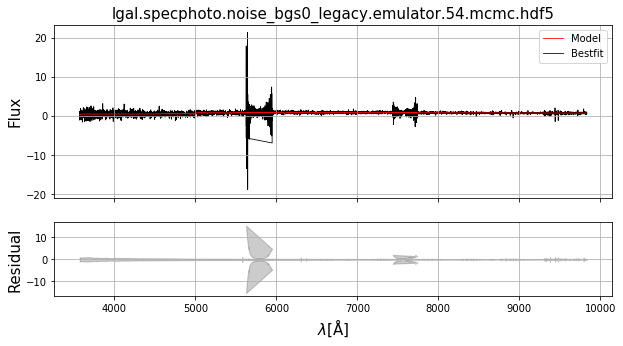

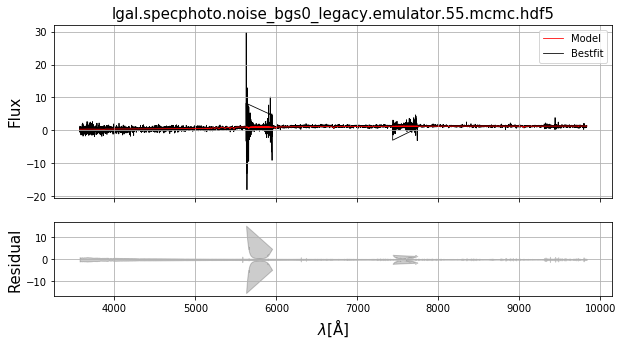

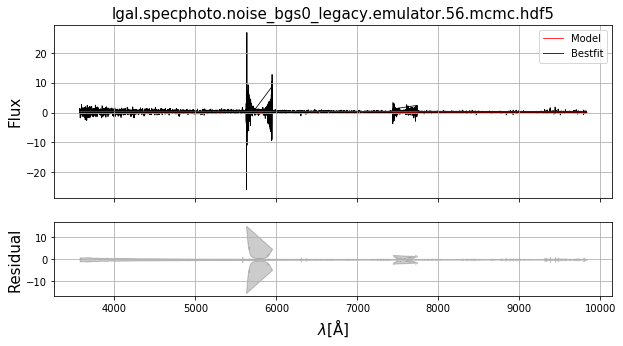

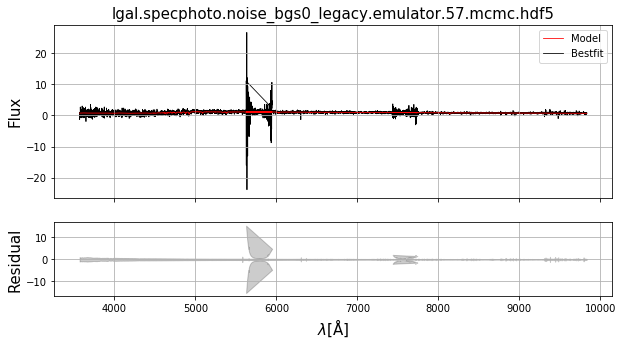

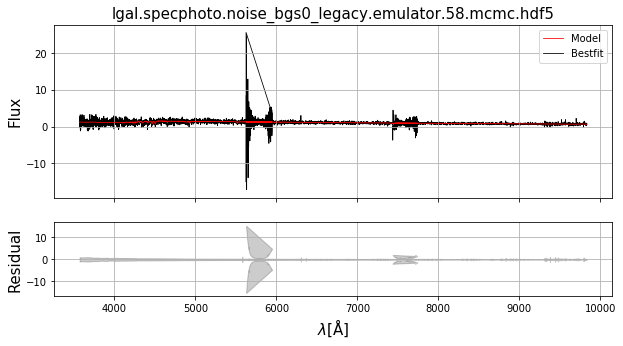

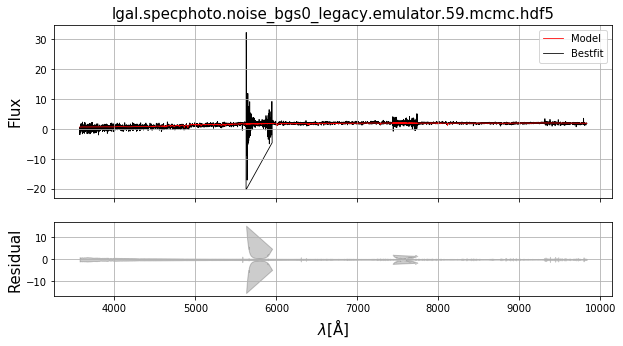

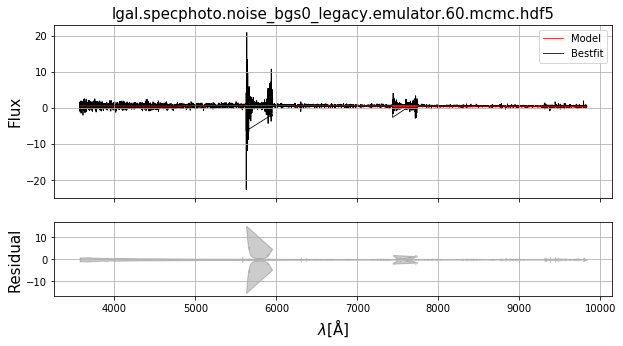

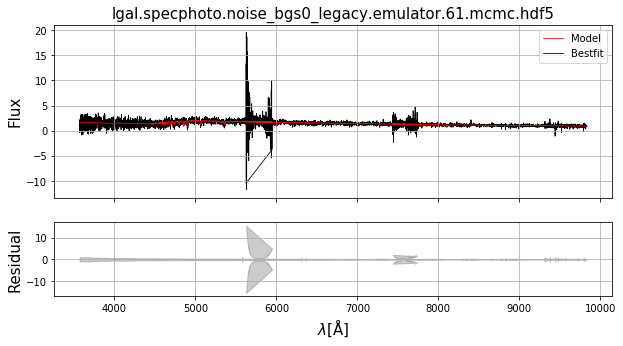

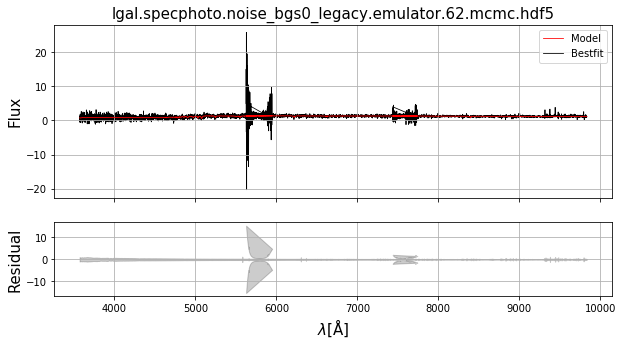

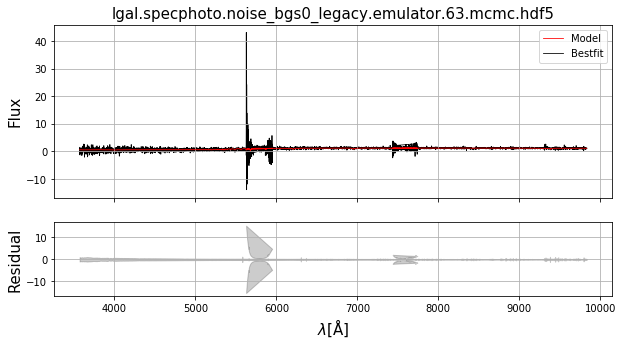

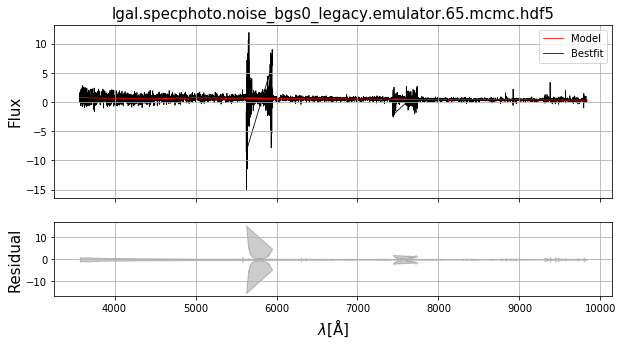

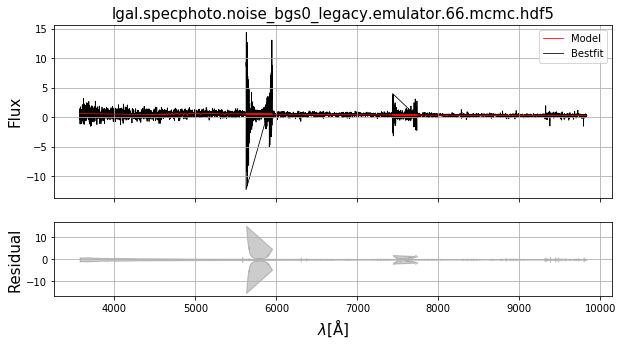

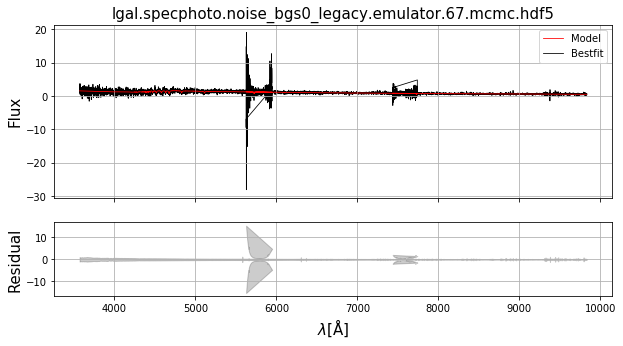

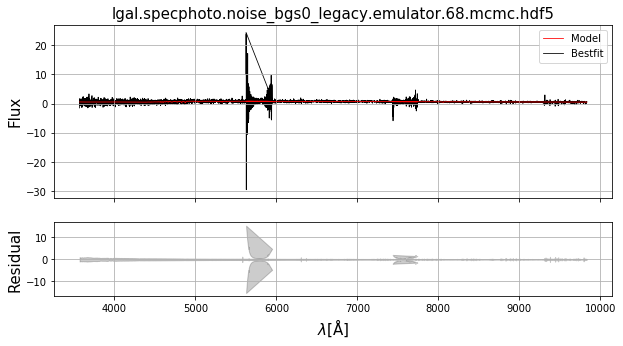

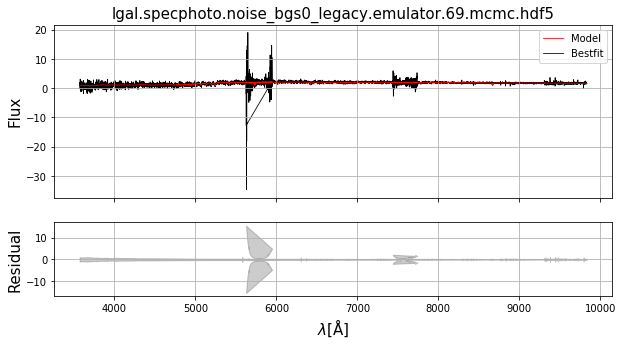

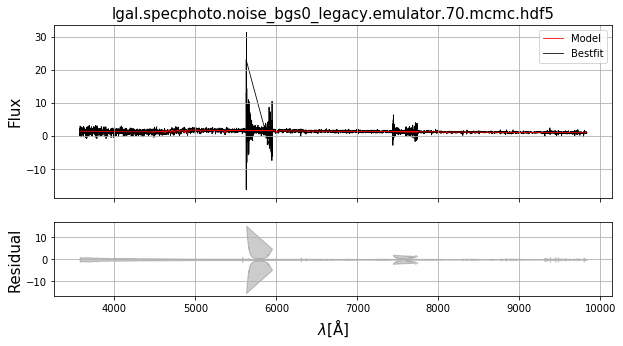

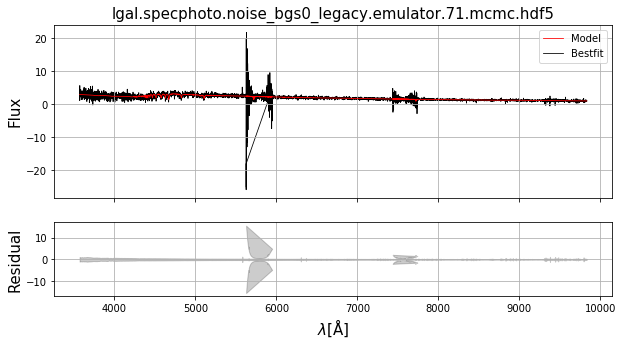

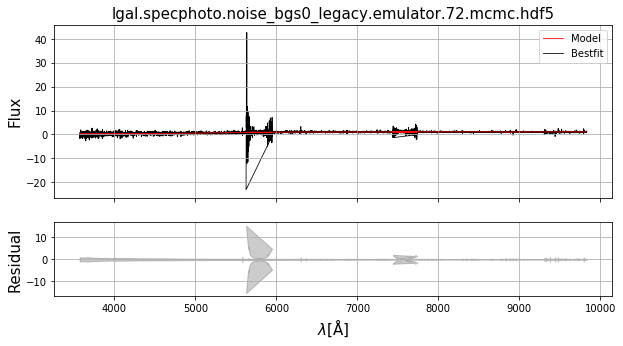

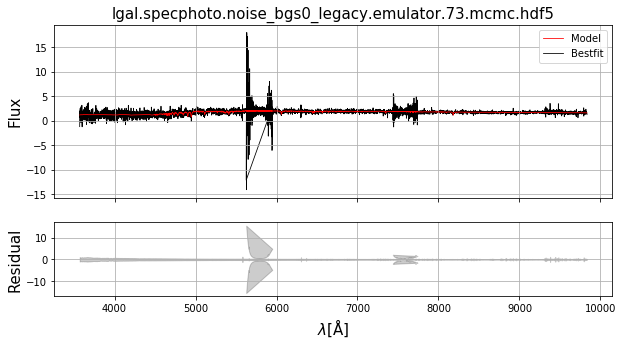

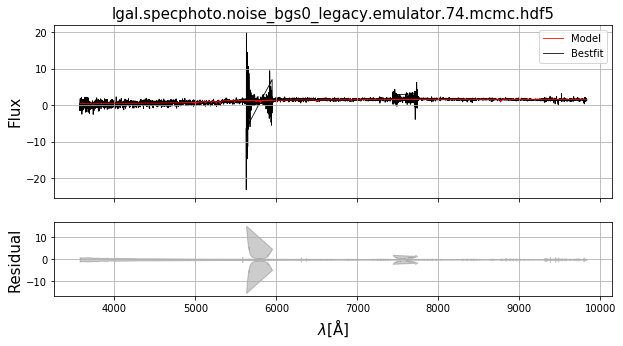

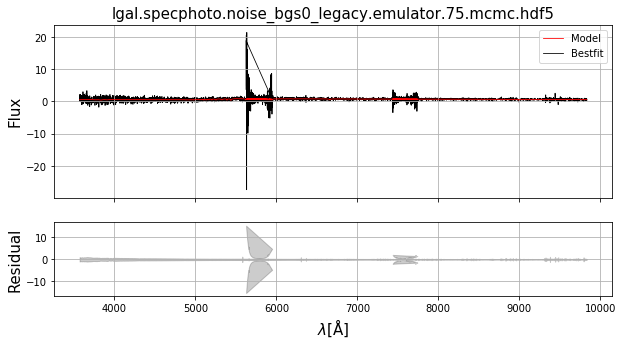

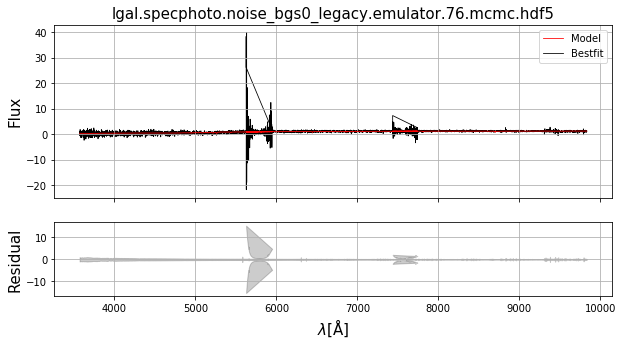

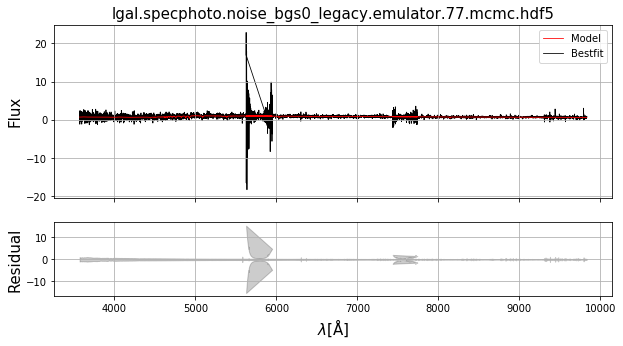

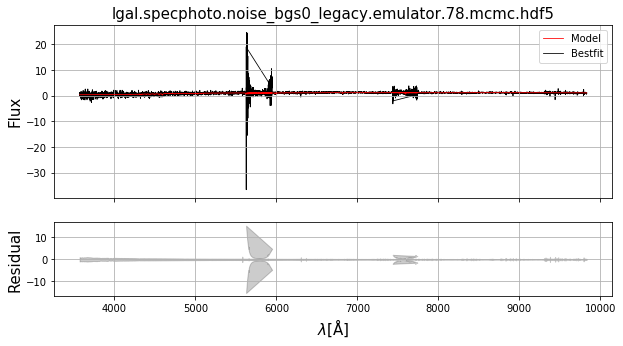

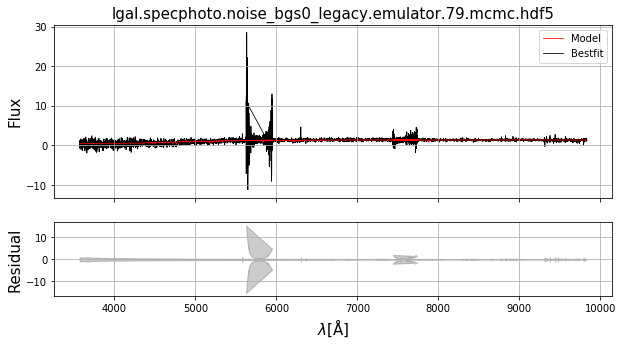

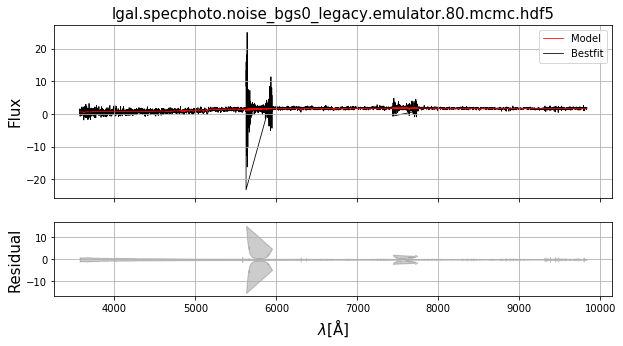

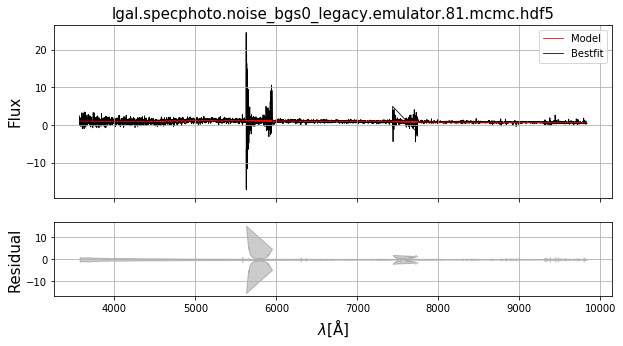

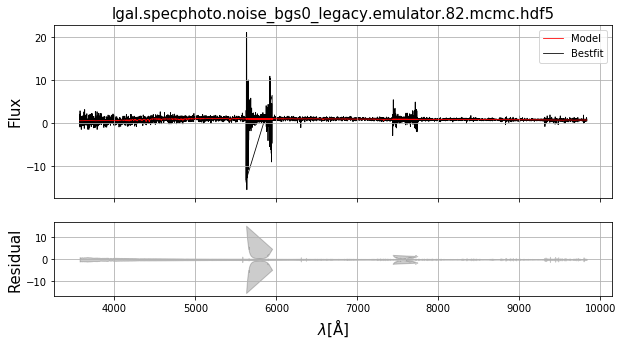

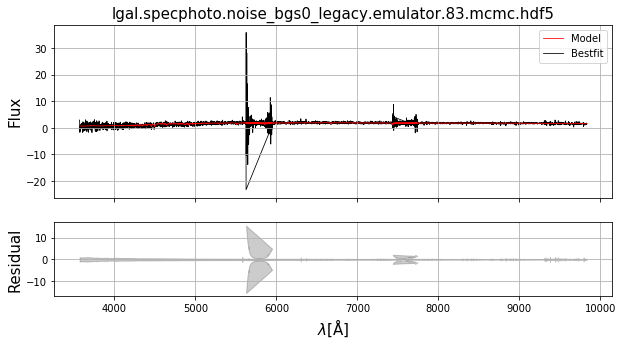

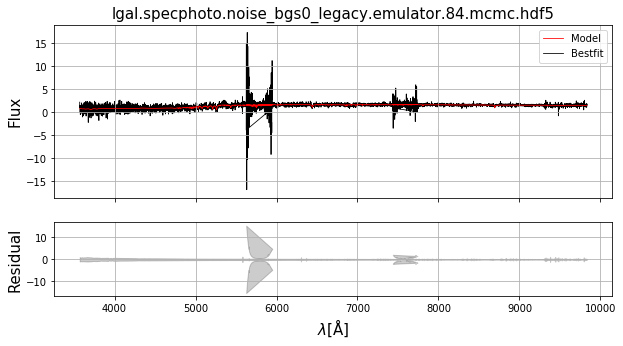

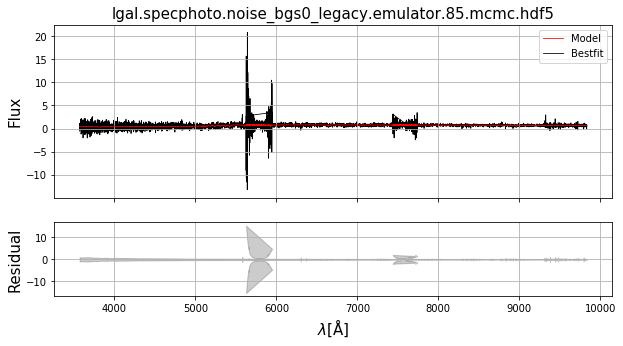

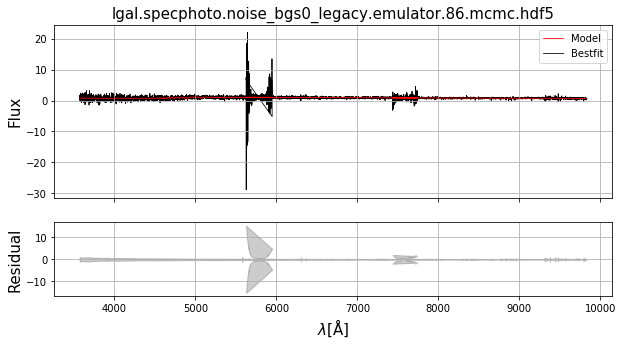

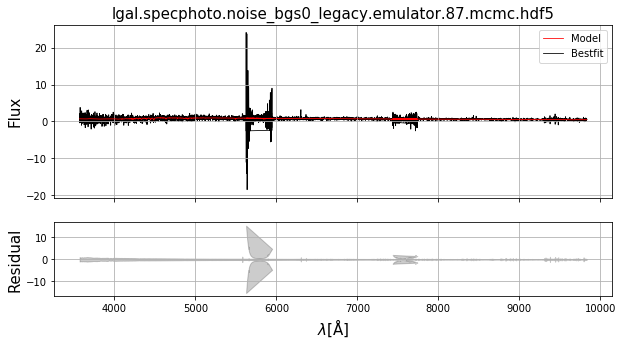

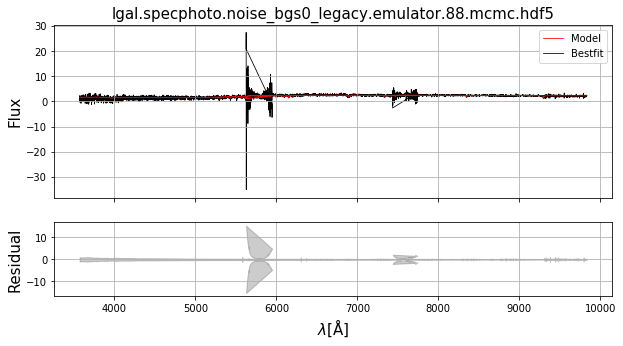

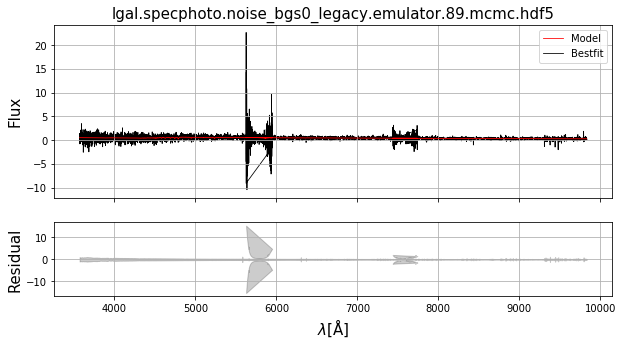

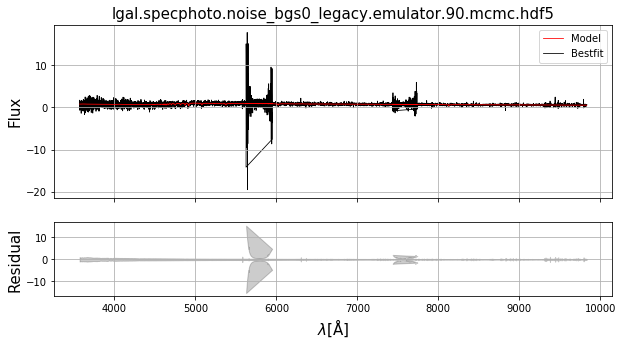

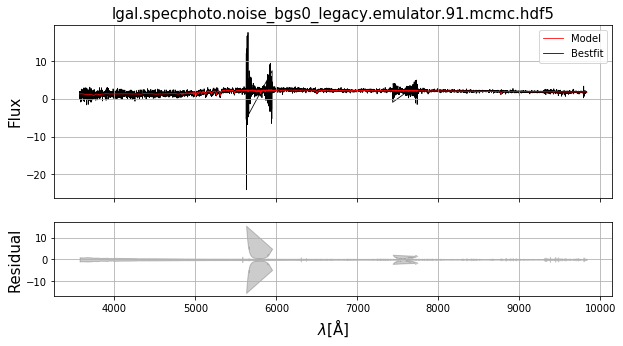

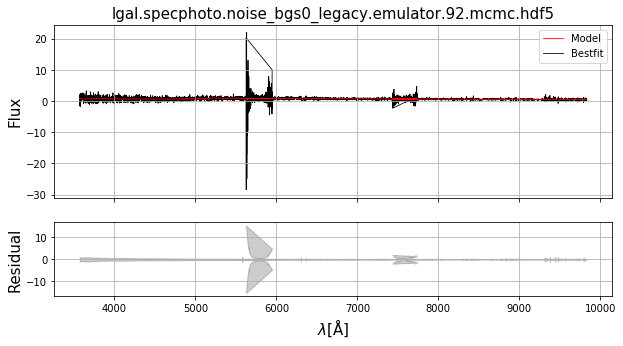

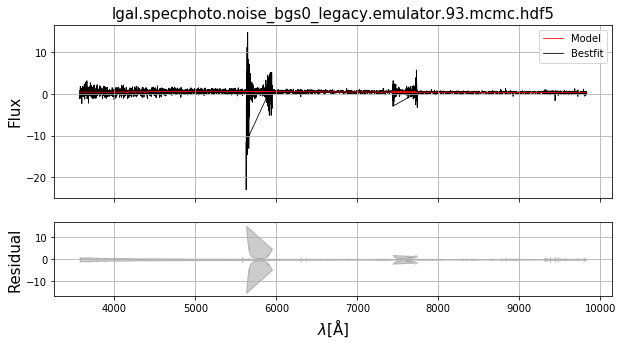

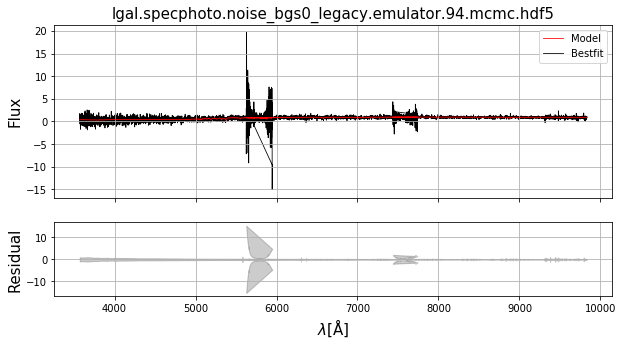

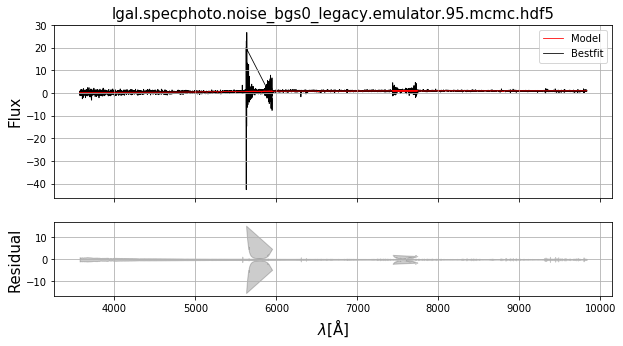

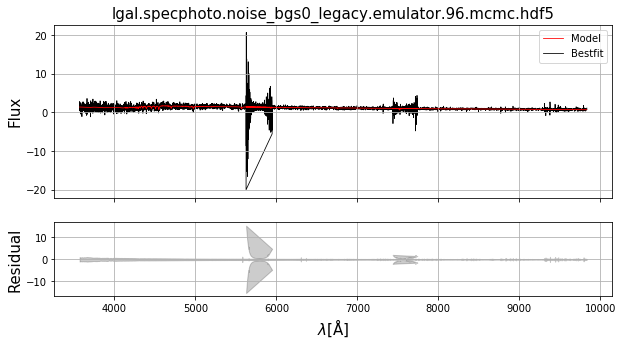

In [47]:
for i in range(97):
    try:
        obj = plotter(40,path+f'lgal.specphoto.noise_bgs0_legacy.emulator.{i}.mcmc.hdf5',i)
        obj.show_joint_spectra()
    except:
        continue
